In [112]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2021'

In [113]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          1073 non-null   object 
 1   Authors                 974 non-null    object 
 2   Author Affiliations     974 non-null    object 
 3   Publication Title       1073 non-null   object 
 4   Date Added To Xplore    1073 non-null   object 
 5   Publication Year        1073 non-null   int64  
 6   Volume                  1073 non-null   int64  
 7   Issue                   1073 non-null   int64  
 8   Start Page              1073 non-null   object 
 9   End Page                1073 non-null   object 
 10  Abstract                1073 non-null   object 
 11  ISSN                    1073 non-null   object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     1073 non-null   object 
 14  Funding Information     787 non-null    

In [114]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          1073 non-null   object 
 1   Authors                 974 non-null    object 
 2   Author Affiliations     974 non-null    object 
 3   Publication Title       1073 non-null   object 
 4   Date Added To Xplore    1073 non-null   object 
 5   Publication Year        1073 non-null   int64  
 6   Volume                  1073 non-null   int64  
 7   Issue                   1073 non-null   int64  
 8   Start Page              1073 non-null   object 
 9   End Page                1073 non-null   object 
 10  Abstract                1073 non-null   object 
 11  ISSN                    1073 non-null   object 
 12  DOI                     1073 non-null   object 
 13  Funding Information     787 non-null    object 
 14  PDF Link                1073 non-null   

In [115]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              974 non-null    object
 1   Author Affiliations  974 non-null    object
 2   Publication Year     1073 non-null   int64 
 3   Funding Information  787 non-null    object
 4   Author Keywords      965 non-null    object
 5   IEEE Terms           971 non-null    object
dtypes: int64(1), object(5)
memory usage: 50.4+ KB


In [116]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              974 non-null    object
 1   Author Affiliations  974 non-null    object
 2   Publication Year     974 non-null    int64 
 3   Funding Information  787 non-null    object
 4   Author Keywords      965 non-null    object
 5   IEEE Terms           971 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.8+ KB


In [117]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,J. Wang; Y. Li; J. Wang; L. Ge; M. Chen; Z. Zh...,"College of Computer and Information, Hohai Uni...",2021,National Natural Science Foundation of China(g...,Low profile;magneto-electric (ME) monopole;mil...,Dipole antennas;Gain;Bandwidth;Magnetoelectric...
1,Z. -B. Zhao; W. -J. Lu; L. Zhu; J. Yu,Jiangsu Key Laboratory of Wireless Communicati...,2021,National Natural Science Foundation of China(g...,2-D sectorial dipole antenna;dual-mode resonan...,Broadband antennas;Dipole antennas;Slot antenn...
2,R. Montoya Moreno; J. Kurvinen; J. Ala-Laurina...,"Department of Electronics and Nanoengineering,...",2021,Huawei Technologies Finland; Sähkötekniikan Ko...,5G;antenna;beamsteering;endfire antenna array;...,Metals;Mobile handsets;Mobile antennas;Antenna...
3,P. Duy Tung; C. W. Jung,"Graduated School of NID Fusion Technology, Seo...",2021,Korean government(grant numbers:2016R1D1A1B020...,Dipole antenna;planar antenna;salt water;surfa...,Surface tension;Dipole antennas;Conductivity;T...
4,M. A. Campo; G. Carluccio; D. Blanco; O. Litsc...,"Terahertz Sensing Group, Delft University of T...",2021,European Union through the European Research C...,Circular polarization;dielectric gratings;leak...,Antennas


In [118]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            print(author)
        countries.append(aff.split(', ')[-1])

In [119]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace("Republic of Korea", "South Korea")
countries = countries.replace("Korea", "South Korea")
countries = countries.replace("United Arab Emirates", "UAE")
countries = countries.replace("Türkiye", "Turkey")
countries = countries.replace("Türkey", "Turkey")
countries = countries.replace("Hong Kong SAR", "Hong Kong")
countries = countries.replace("Netherlands", "The Netherlands")
countries = countries.replace("SAR", "SAR China")
countries = countries.replace("U.K", "U.K.")
countries = countries.replace("China,", "China")
countries = countries.replace("P. R. China", "China")
countries = countries.replace("the Czech Republic", "Czech Republic")
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)

<class 'pandas.core.series.Series'>
RangeIndex: 4111 entries, 0 to 4110
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4111 non-null   object
dtypes: object(1)
memory usage: 32.2+ KB
None
<class 'pandas.core.series.Series'>
Index: 4111 entries, 0 to 4110
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4111 non-null   object
dtypes: object(1)
memory usage: 64.2+ KB
None
China              1944
USA                 374
France              162
U.K.                161
Canada              134
Italy               124
Spain               114
Australia           112
South Korea          93
Singapore            78
India                78
Germany              68
Hong Kong            50
Sweden               50
Finland              49
Iran                 49
Japan                47
The Netherlands      46
Belgium              46
Turkey               43
Denmark              43
Taiwan               27
Russia               21
Saudi Arabia         21
Brazil             

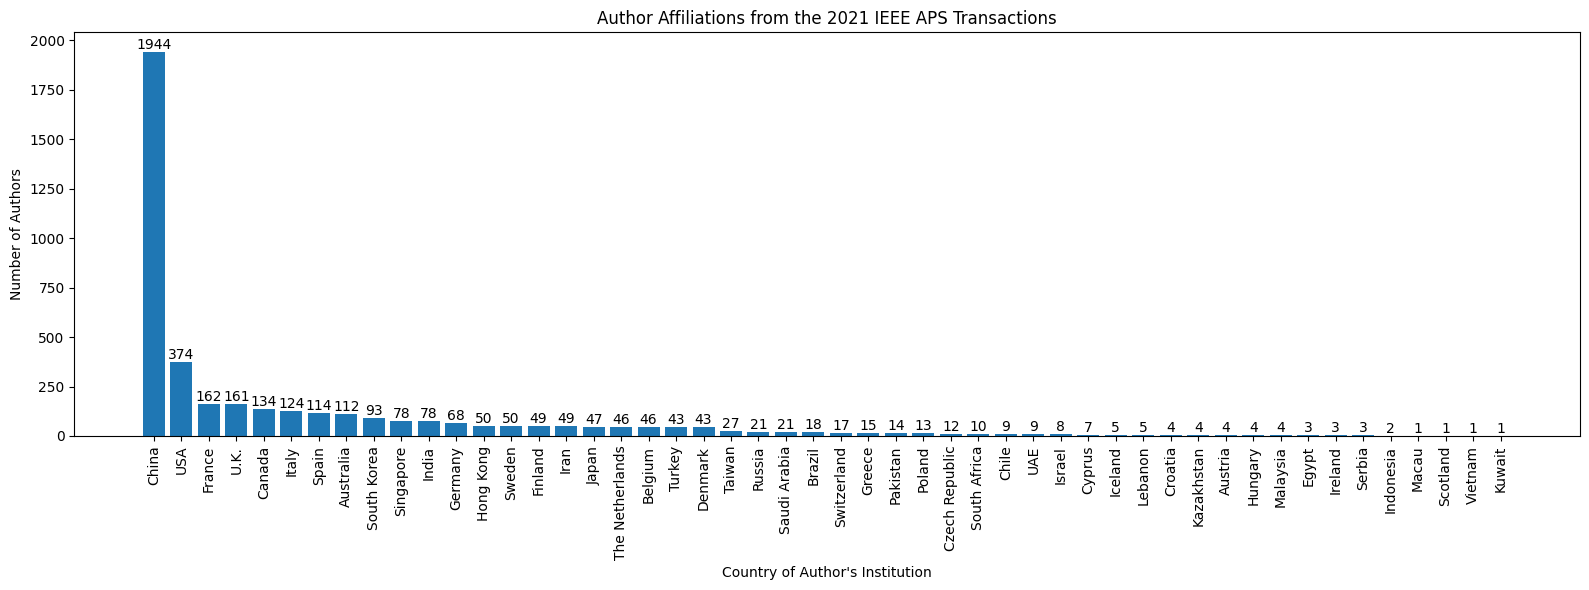

In [120]:
fig, ax = plt.subplots(figsize=(16, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [121]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


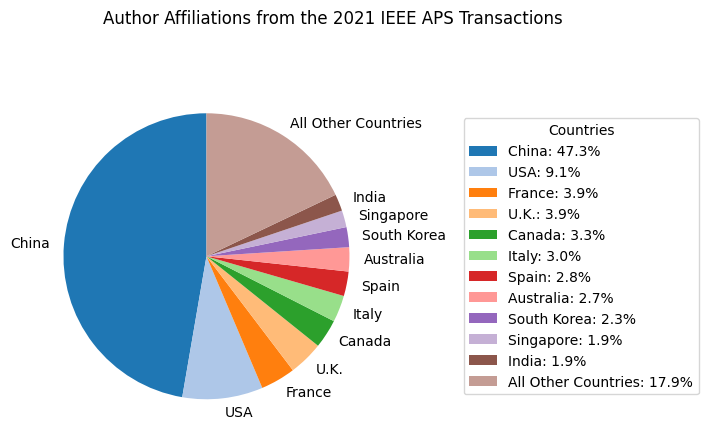

In [122]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()